#### <b>Note:</b> If you read this file directly from GitLab, you may see redundant backslashes. You should open this file in JupyterLab to view the expressions properly.

# Regex

## Reading

- New text: "Principles and Techniques of Data Science", by Sam Lau, Joey Gonzalez, and Deb Nolan
- Used for Berkeley's DS100 Course.
- Read Chapter 13: https://www.textbook.ds100.org/ch/13/text_regex.html


## Regular expressions aka Regex

- Regex: a small language for describing patterns to search for regex patterns are used in many different programming languages (like how many different languages might use SQL queries)
- https://blog.teamtreehouse.com/regular-expressions-10-languages
- Inventor: Stephen Cole Kleene (UW-Madison mathematician) --- https://en.wikipedia.org/wiki/Stephen_Cole_Kleene

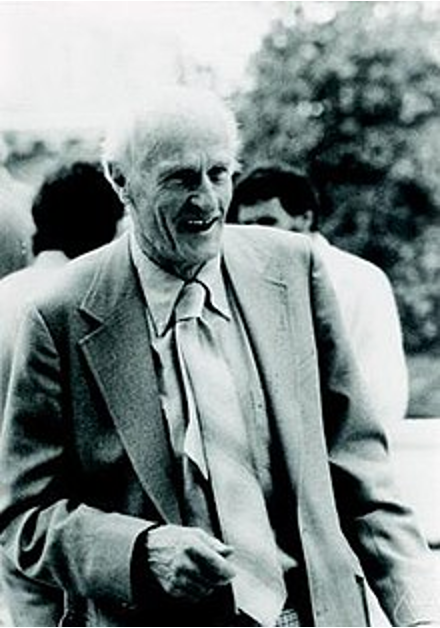

### Review of `str.find(<search string>)` method

- `str.find(<search string>)` method returns the index of the first matching occurrence of the search string 
- `str.find` is VERY limited -- what if we want to:
    - find all occurrences of "320"
    - find any 3-digit numbers?
    - find any numbers at all?
    - find a number before the word "projects"?
    - substitute a number for something else?

Regexes can do all these things!

In [ ]:
msg = "In CS 320,\tthere are 28 lectures, 11 quizzes, 3 exams,\t6 projects, and 1000 things to learn. CS 320 is awesome!"

# does the string contain "320"?
has_320 = msg.find("320") >= 0
print(has_320, msg.find("320"))

In [ ]:
# prints tab between A and B
print("A\tB")
# what if we want to literally print \t between A and B?
# we need to use escape sequence (\)
print("A\\tB")

### Raw string

- easier way to tell Python to print content using raw format of the string than remembering to use escape sequence always
- Syntax: `r"<some string>"` ---> add "r" in the front

In [ ]:
print(r"A\tB")

In [ ]:
#import statements
import re
from subprocess import check_output
import pandas as pd

In [ ]:
# Example strings
# from DS100 book...
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯"])
print(s1)

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)
"""
print(s2)

s3 = "In CS 320, there are 11 quizzes, 6 projects, 28 lectures, and 1000 things to learn.  CS 320 is awesome!"
print(s3)

s4 = """In CS 320,  there are 11 quizzes,    6 projects,
28 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

In [ ]:
print(s1)

### Regex: double escaping (use case for raw strings)

- Regex does another level of formatting with special sequences like \t, \n, etc.,

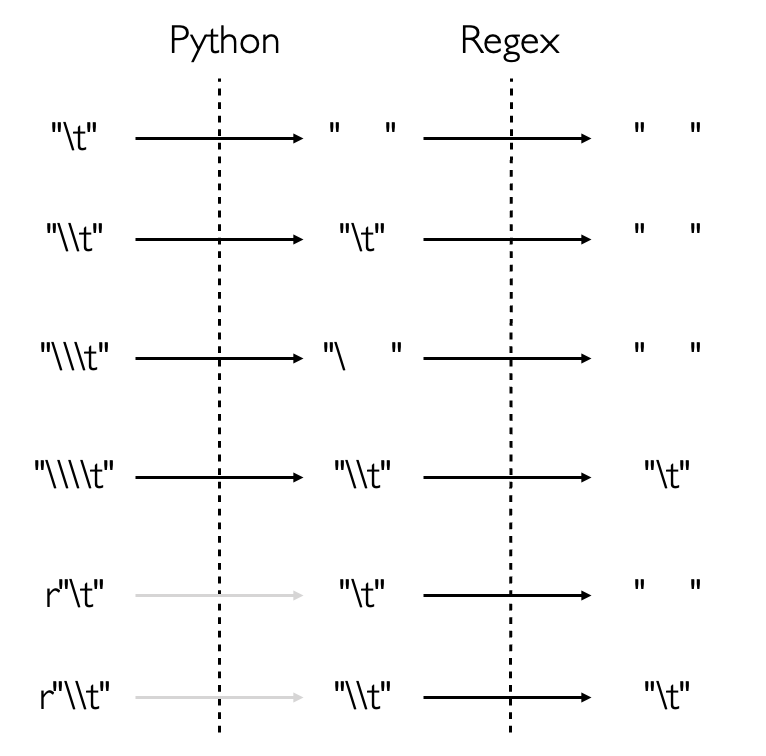

#### Find the right arm "\".

- `reg(<PATTERN>, <STRING>)`

In [ ]:
# Python will be unhappy 
# \ works as escape sequence here and it is trying to escape the second ",
# meaning it thinks we are mentioning " literal


In [ ]:
# Regex will be unhappy
reg("", s1) 

In [ ]:
# Correct and cumbersome way to do this
reg("", s1)

In [ ]:
# Better way would be to use raw string to avoid double escaping
reg(, s1)

### Regex is case sensitive

#### Find all occurrences of "a".

In [ ]:
reg(r"", s1)

#### Find all occurrences of "A".

In [ ]:
reg(r"", s1)

### Character classes

- Character classes can be mentioned within `[...]`
- `^` means `NOT` of a character class
- `-` enables us to mention range of characters, for example `[A-Z]`
- `|` enables us to perform `OR`

#### Find both "a" and "A".

In [ ]:
# Doesn't work - because we are trying to match literally for "aA"
reg("aA", s1)

In [ ]:
reg("", s1)

#### Find all the vowels.

In [ ]:
reg("[aeiouAEIOU]", s1)

#### Find everything except vowels.

In [ ]:
reg("[aeiouAEIOU]", s1)

#### Find all capital letters.

In [ ]:
reg("", s1)

#### What if we want to find "A", "Z", and "-"?

In [ ]:
# How can we change this to do that?
reg(r"[A-Z]", s1)

#### Invalid ranges don't work. For example: `[Z-A]`.

In [ ]:
reg("[Z-A]", s1) 

#### Find all words related to graphs.

In [ ]:
# | means OR
reg(r"tree|directed|undirected|graph|DAG|node|child|parent|root|cycles", s1)

### Metacharacters

- predefined character classes
    - `\d` => digits
    - `\s` => whitespace (space, tab, newline)
    - `\w` => "word" characters (digits, letters, underscores, etc) --- helpful for variable name matches and whole word matches (as it doesn't match whitespace --- `\s`)
    - `.` => wildcard: anything except newline
- capitalized version of character classes mean `NOT`, for example `\D` => everything except digits

#### Find all digits.

In [ ]:
# v1
reg(r"[0-9]", s1)

In [ ]:
# v2 - with metacharacters
reg(r"", s1)

#### Find all whitespaces.

In [ ]:
reg(r"", s1)

#### Find everything except whitespaces.

In [ ]:
reg(r"", s1)

#### Find anything except newline.

In [ ]:
reg(r"", s1)

#### What if we want to actually match "."?

In [ ]:
#How can we change this to do that?
reg(r".", s1)

### REPETITION

- `<character>{<num matches>}` - for example: `w{3}`
- matches cannot overlap

#### Find all "www".

In [ ]:
# v1
reg("www", s1)

In [ ]:
# v2 - repitition
reg("", s1)

In [ ]:
# Lesson: matches cannot overlap
reg("w{2}", s1) 

### Variable length repitition operators

- `*` => 0 or more (greedy: match as many characters as possible)
- `+` => 1 or more (greedy: match as many characters as possible)
- `?` => 0 or 1
- `*?` => 0 or more (non-greedy: match as few characters as possible)
- `+?` => 1 or more (non-greedy: match as few characters as possible)

#### Find everything inside of parentheses.

In [ ]:
# this doesn't work
# it captures everything because () have special meaning (coming up)
reg(r"", s1)

In [ ]:
# How can we change this to not use special meaning of ()?
# * is greedy: match as many characters as possible
reg(r"(.*)", s1)

In [ ]:
# non-greedy: stop at the first possible spot instead of the last possible spot
reg(r"\(.*?\)", s1)

### Anchor characters
- `^` => start of string
    - `^` is overloaded --- what was the other usage?
- `$` => end of string

#### Find everything in the first sentence.

In [ ]:
# doesn't work because remember regex finds all possible matches
# so it matches every single sentence 
# (even though we are doing non-greedy match)
reg(r".*?\.", s1)

In [ ]:
reg(r"", s1)

#### Find everything in the first two sentences.

In [ ]:
reg(r"^.*?\.", s1)

#### Find last "word" in the sentence.

In [ ]:
reg(r"", s1)

### Case study: find all phone numbers.

In [ ]:
print(s2)
# The country code (1) in the front is optional
# The area code (608) is also optional
# Doesn't make sense to match country code without area code though!

In [ ]:
# Full US phone numbers
reg(r"", s2)

In [ ]:
# The country code (1) in the front is optional
reg(r"(\d-)?\d{3}-\d{3}-\d{4}", s2)

In [ ]:
# The area code (608) is also optional
# Doesn't make sense to have country code without area code though!
reg(r"(\d-)?(\d{3}-)?\d{3}-\d{4}", s2)

In [ ]:
# This is good enough for 320 quizzes/tests
# But clearly, the last match is not correct
reg(r"((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

Regex documentation link: https://docs.python.org/3/library/re.html.

In [ ]:
# BONUS: negative lookbehind (I won't test this)
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

There is also a negative lookahead. For example, how to avoid matching "1-608-123-456" in "1-608-123-4569999". You can explore this if you are interested.

In [ ]:
# not the solution
reg(r"(?<!\d\-)((\d-)?\d{3}-)?\d{3}-\d{4}", "608-123-4569999")

### Testing your regex
- you could use `reg(...)` function
- another useful resource: https://regex101.com/

### `re` module
- `re.findall(<PATTERN>, <SEARCH STRING>)`: regular expression matches
    - returns a list of strings 
- `re.sub(<PATTERN>, <REPLACEMENT>, <SEARCH STRING>)`: regular expression match + substitution
    - returns a new string with the substitutions (remember strings are immutable)

In [ ]:
print(msg)

#### Find all digits.

In [ ]:
re.findall(r"\d+", msg)

### Groups
- we can capture matches using `()` => this is the special meaning of `()`
- returns a list of tuples, where length of the tuple will be number of groups

#### Find all digits and the word that comes after that.

In [ ]:
re.findall(r"(\d+) (\w+)", msg)

### Unlike matches, groups can overlap

#### Find and group all digits and the word that comes after that.

In [ ]:
re.findall(r"((\d+) (\w+))", msg)

#### Substitute all digits with "###".

In [ ]:
re.sub(r"\d+", "###", msg)

#### Substitute all whitespaces with single white space.

In [ ]:
print(msg)

In [ ]:
re.sub(r"\s+", " ", msg)

### How to use groups is substitution?
- `\g<N>` gives you the result of the N'th grouping.

#### Substitute all whitespaces with single white space.

In [ ]:
print(re.sub(r"(\d+)", "<b>\g<1></b>", msg))

In CS <b>320</b>, there are <b>28</b> lectures, <b>11</b> quizzes, <b>3</b> exams, <b>6</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!

### Git log example

#### Run `git log` as a shell command

In [ ]:
!git log

In [ ]:
git_log_output = str(check_output(["git", "log"]), encoding="utf-8")
print(git_log_output[:500])

#### GOAL: find all the commit numbers

In [ ]:
commits = re.findall(r"", git_log_output)
# recent 10 commit numbers
commits[:10]

#### What days of the week does the team push things into this repo?

In [ ]:
print(git_log_output[:500])

In [ ]:
days = re.findall(r"", git_log_output)
days

#### Count unique days

In [ ]:
day_counts = pd.Series(days).value_counts()
day_counts

#### Sort by day of the week

In [ ]:
sorted_day_counts = day_counts.loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sun"]]
sorted_day_counts

#### Create a bar plot

In [ ]:
ax = sorted_day_counts.plot.bar()
ax.set_ylabel("Commit counts")
ax.set_xlabel("Days of the week")

#### Find all commit authors names.

In [ ]:
authors = re.findall(r"", git_log_output)
authors[0]

#### `git log` from projects repo

In [ ]:
git_log_output = str(check_output(["git", "log"], cwd="../../projects-and-labs"), encoding="utf-8")
print(git_log_output[:1000])

In [ ]:
re.findall(r"", git_log_output)

### Emails example

In [ ]:
s = """
Gurmail [Instructor] - gsingh58(AT) cs.wisc.edu
Jinlang [Head TA] - jwang2775 (AT) wisc.edu
Elliot [TA] - eepickens (AT) cs.wisc.edu
Alex [TA] - aclinton (AT) wisc.edu
Bowman [TA] - bnbrown3 (AT) wisc.edu
Hafeez [TA] - aneesali (AT) wisc.edu
William [TA] - wycong (AT) wisc.edu
"""
print(s)

In [ ]:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]]?)"
domain = r"\w+\.(\w+\.)?(edu|com|org|net|io|gov)"

full_regex = f"(({name})\s*({at})\s*({domain}))"

re.findall(full_regex, s)

In [ ]:
print("REGEX:", full_regex)
for match in re.findall(full_regex, s):
    print(match[1] + "@" + match[4])

### Self-practice

Q1: Which regex will NOT match "123"
1. r"\d\d\d"
2. r"\d{3}"
3. r"\D\D\D"
4. r"..."

Q2: What will r"^A" match?
1. "A"
2. "^A"
3. "BA"
4. "B"
5. "BB"

Q3: Which one can match "HH"?
1. r"HA+H"
2. r"HA+?H"
3. r"H(A+)?H"

Q4: Which string(s) will match r"^(ha)*$"
1. ""
2. "hahah"
3. "that"
4. "HAHA"

Q5: What is the type of the following?re.findall(r"(\d) (\w+)", some_str)[0]
1. list
2. tuple
3. string

Q6: What will it do?
```python
re.sub(r"(\d{3})-(\d{3}-\d{4})",
       r"(\g<1>) \g<2>",
       "608-123-4567")
```

In [ ]:
The answers of these questions can be found in self_practice.ipynb. You may want to try to answer these questions yourself and then verify your answers.